In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Random inputs for mace

In [1]:
def uniform(max, min, round):
    return np.round((max - min) * np.random.rand() + min,round)

def write_random_input_file(x):

    lr    = 10.0**uniform(-5, -3,3)
    z_dim = np.random.choice([8, 10, 16, 32])

    mse1 = 10.0**uniform(3, 7, 0) 
    evo1 = 10.0**uniform(0, np.log10(0.1*mse1), 0) 
    idn1 = 10.0**uniform(2, 5, 0)  
    mse2 = 10.0**uniform(0, 2, 0)

    with open(f"/STER/silkem/MACE/input/xmas2023/in_file_{x}.txt", "w") as file:
        file.write(f"""
## input model

lr          = {lr}
tot_epochs  = 100
nb_epochs   = 61
losstype    = mse_idn_evo
z_dim       = {z_dim}
nb_samples  = 18000

## loss fractions

mse1 = {mse1}
rel1 = 0 
evo1 = {evo1}
idn1 = {idn1}

mse2 = {mse2}
rel2 = 0
evo2 = 1
idn2 = 1
"""
)

In [29]:
def write_job_script(x):
    with open(f"/STER/silkem/mace_jobs/slurm_job_mace{x}", "w") as file:
        file.write(f"""#!/bin/bash
#SBATCH --job-name='mace-xmas-training-{x}'
#SBATCH --account=silkem
#SBATCH --time=4-00:00:00
#SBATCH --output=./mace_logs/out/xmas{x}_%A.out
#SBATCH --error=./mace_logs/error/xmas{x}_%A.err
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
#SBATCH --cpus-per-task=2
#SBATCH --mem-per-cpu=16G
#SBATCH --hint=multithread
#SBATCH --partition=long
#SBATCH --array=1-150


python /STER/silkem/MACE/src/mace/CSE_0D/mace_training_routine.py xmas2023/in_file_{x}
"""
)

In [59]:
write_random_input_file(101)

In [5]:
i=1
while i < 3:
    write_job_script(100+i)
    write_random_input_file(100+i)
    i += 1

In [30]:
i=1
while i <= 150:
    write_random_input_file(i)
    write_job_script(i)
    i += 1

### Inputs grid mace

In [3]:
with open(f"/STER/silkem/MACE/input/grid/overview.txt", "w") as file:
    file.write(f"""{'index'.ljust(10)} {'lr'.ljust(10)} {'z_dim'.ljust(10)} {'nb_evol'.ljust(10)}
            """)

lrs      = [1.e-5,1.e-4]
z_dims   = [8,16,32]
nb_evols = [8,16,32]

x=1
for nb_evol in nb_evols:
    for lr in lrs:
        for z_dim in z_dims:
        
            print(x)
            ## WRITE INPUT FILE
            with open(f"/STER/silkem/MACE/input/grid/grid_{x}.in", "w") as file:
                file.write(f"""
## input model

lr          = {lr}
ini_epochs  = 5
tot_epochs  = 250
nb_epochs   = 151
losstype    = mse_idn
z_dim       = {z_dim}
nb_samples  = 10000
nb_evol     = {nb_evol}

nb_hidden = 1
ae_type = simple

## loss fractions

mse1 = 1
rel1 = 0 
evo1 = 0
idn1 = 1

mse2 = 100
rel2 = 0
evo2 = 0
idn2 = 100
"""
)
                # Write overview file
            with open(f"/STER/silkem/MACE/input/grid/overview.txt", "a") as file:
                file.write(f"""{str(x).ljust(10)} {str(nb_evol).ljust(10)} {str(lr).ljust(10)} {str(z_dim).ljust(10)}  \n""")
                           
            x+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [6]:
with open(f"/STER/silkem/MACE/input/grid2/overview.txt", "w") as file:
    file.write(f"""{'index'.ljust(10)} {'nb_evol'.ljust(10)} {'z_dim'.ljust(10)} 
            """)

# lrs      = [1.e-5,1.e-4]
z_dims   = [8,16,32]
nb_evols = [8,16,32]

x=1
for nb_evol in nb_evols:
    # for lr in lrs:
    for z_dim in z_dims:
    
        print(x)
        ## WRITE INPUT FILE
        with open(f"/STER/silkem/MACE/input/grid2/grid_{x}.in", "w") as file:
            file.write(f"""
## input model

lr          = 1.e-4
ini_epochs  = 5
tot_epochs  = 250
nb_epochs   = 151
losstype    = mse_idn
z_dim       = {z_dim}
nb_samples  = 10000
nb_evol     = {nb_evol}

nb_hidden = 1
ae_type = simple

## loss fractions

mse1 = 1
rel1 = 0 
evo1 = 0
idn1 = 1

mse2 = 100
rel2 = 0
evo2 = 0
idn2 = 100
"""
)
                # Write overview file
        with open(f"/STER/silkem/MACE/input/grid2/overview.txt", "a") as file:
            file.write(f"""{str(x).ljust(10)} {str(nb_evol).ljust(10)} {str(z_dim).ljust(10)}  \n""")
                        
        x+=1

1
2
3
4
5
6
7
8
9


In [7]:
m = [11,11,11,22,22,22,33,33,33,44,44,44]
d = [8,16,32,8,16,32,8,16,32,8,16,32]

Text(0.5, 0, 'm')

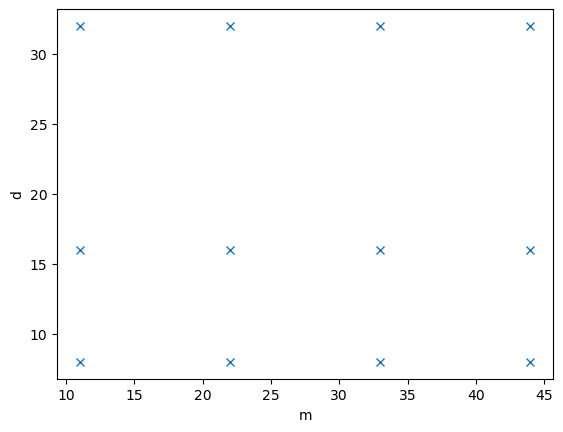

In [10]:
plt.plot(m,d, 'x')
plt.ylabel('d')
plt.xlabel('m')